In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# uploading dataset
data = pd.read_csv("/kaggle/input/dmt-2024-2nd-assignment/submission_sample.csv")
training_data = pd.read_csv("/kaggle/input/dmt-2024-2nd-assignment/training_set_VU_DM.csv")
test_data = pd.read_csv("/kaggle/input/dmt-2024-2nd-assignment/test_set_VU_DM.csv")

In [5]:
data.head()

,srch_id,prop_id
0,1,3180
1,1,5543
2,1,14142
3,1,22393
4,1,24194


In [6]:
training_data.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [7]:
training_data.shape

(4958347, 54)

In [7]:
training_data.describe()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,gross_bookings_usd
count,4.958347e+06,4958347,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,...,240157.000000,260976.000000,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,138390.000000
mean,1.663666e+05,2013-03-11 06:19:37.890842880,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,...,0.128329,0.075957,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,386.283316
min,1.000000e+00,2012-11-01 00:08:29,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000
25%,8.293600e+04,2013-01-14 17:47:32,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,...,0.000000,0.000000,6.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,124.000000
50%,1.665070e+05,2013-03-13 20:13:18,5.000000e+00,2.190000e+02,3.450000,152.240000,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,...,0.000000,0.000000,11.000000,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,218.400000
75%,2.497240e+05,2013-05-10 00:01:38,1.400000e+01,2.190000e+02,3.930000,213.490000,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,...,0.000000,0.000000,18.000000,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,429.790000
max,3.327850e+05,2013-06-30 23:58:24,3.400000e+01,2.310000e+02,5.000000,1958.700000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,...,1.000000,1.000000,1620.000000,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,159292.380000
std,9.611223e+04,NaN,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,...,0.559841,0.302668,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,821.190577


In [8]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 54 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   srch_id                      int64         
 1   date_time                    datetime64[ns]
 2   site_id                      int64         
 3   visitor_location_country_id  int64         
 4   visitor_hist_starrating      float64       
 5   visitor_hist_adr_usd         float64       
 6   prop_country_id              int64         
 7   prop_id                      int64         
 8   prop_starrating              int64         
 9   prop_review_score            float64       
 10  prop_brand_bool              int64         
 11  prop_location_score1         float64       
 12  prop_location_score2         float64       
 13  prop_log_historical_price    float64       
 14  position                     int64         
 15  price_usd                    float64       
 16  

In [11]:
train = training_data

# Calculate the number of bookings
bookings = train[train.booking_bool == 1].shape[0]

# Calculate the total number of non-null booking_bool entries
total_non_null = train[train.booking_bool.notnull()].shape[0]

# Calculate the percentage of bookings
booking_percentage = (bookings / total_non_null) * 100

print(booking_percentage, '%')

2.7910511305481442 %


In [21]:
columns_to_plot = ['price_usd', 'prop_starrating', 'prop_review_score', 
                   'prop_location_score1',
                   'visitor_hist_starrating','visitor_hist_adr_usd',
                  'prop_log_historical_price','srch_length_of_stay',
                  'srch_booking_window','srch_adults_count',
                   'srch_children_count','srch_room_count',
                  'orig_destination_distance','gross_bookings_usd']

columns_to_plot_2 = ['price_usd','srch_length_of_stay',
                  'srch_booking_window','srch_adults_count',
                   'srch_children_count','srch_room_count',
                  'orig_destination_distance','gross_bookings_usd']

columns_to_plot_3 = ['price_usd','srch_length_of_stay']

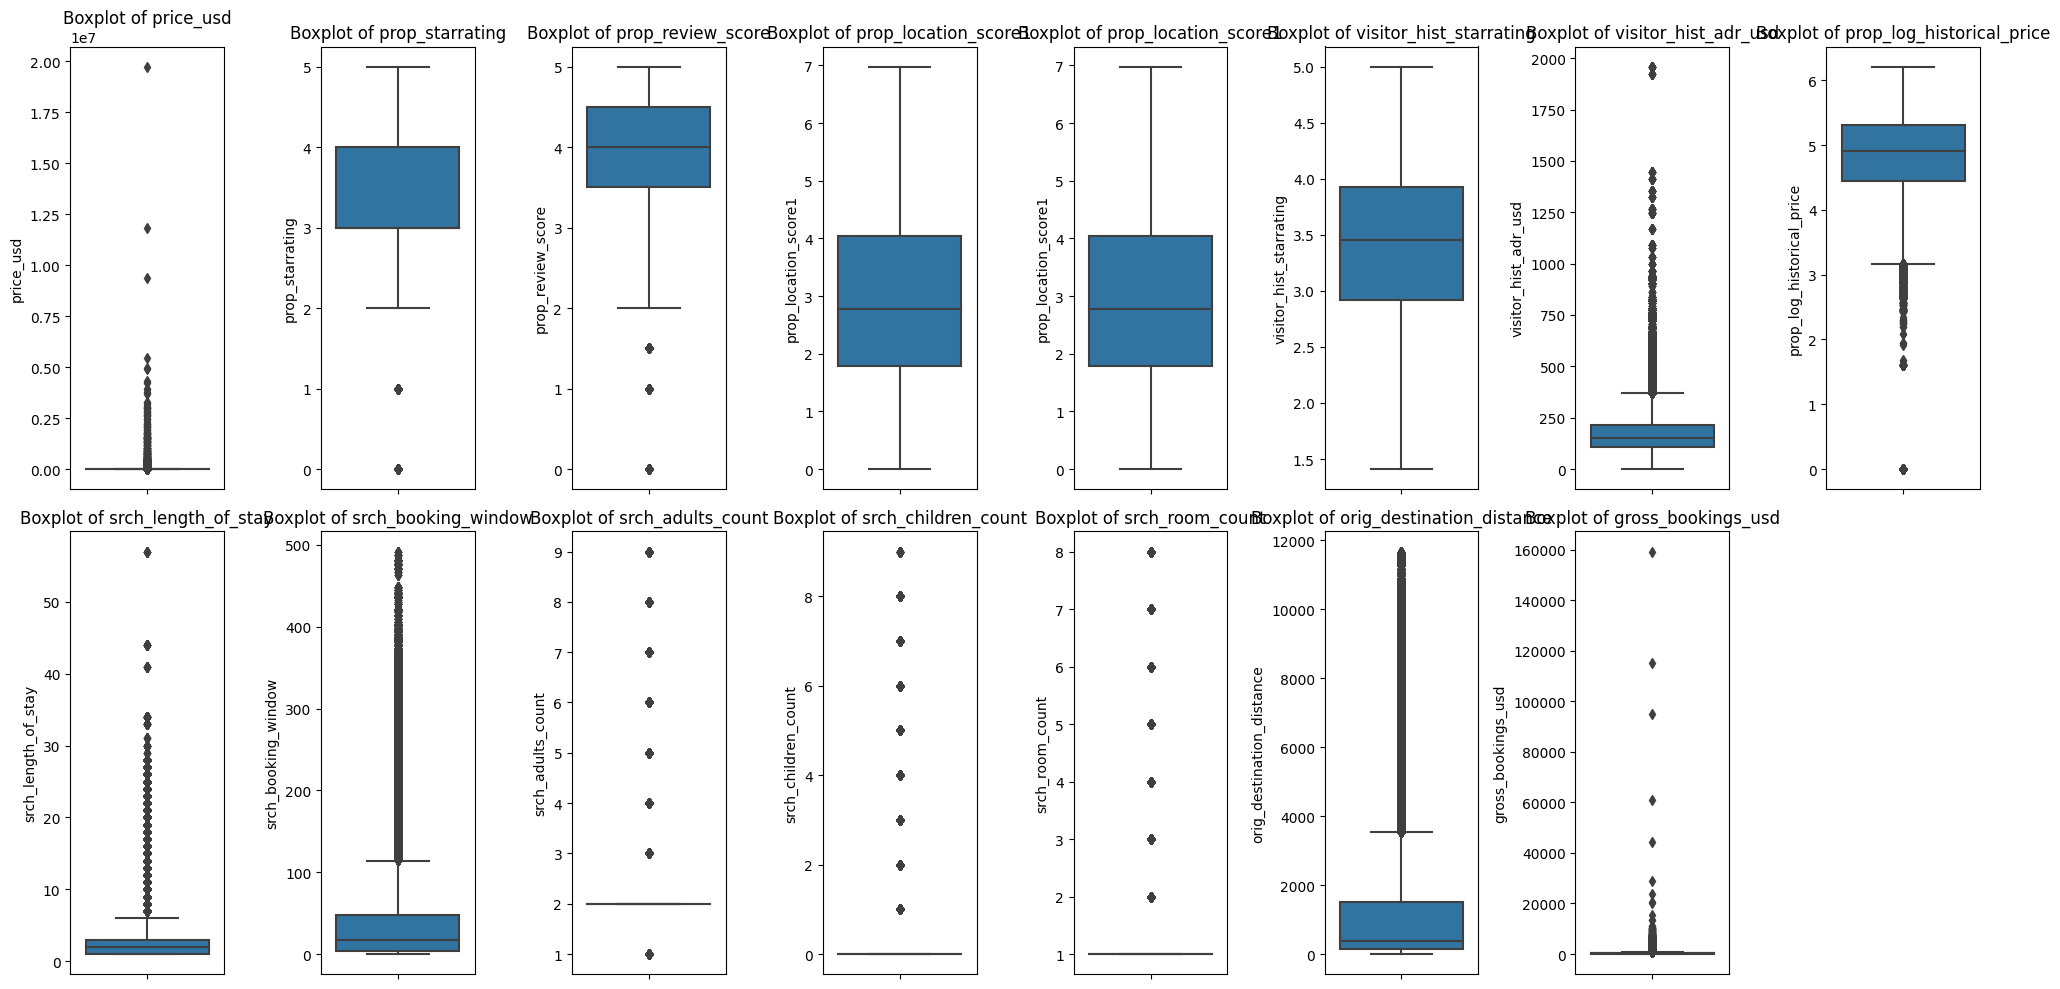

In [ ]:
# Creating boxplots for Outlier detection
plt.figure(figsize=(20, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, len(columns_to_plot)//2 + len(columns_to_plot)%2, i)
    sns.boxplot(y=training_data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()

In [ ]:
# Based on the description of the boxplots, the variables "price_usd", 
# "visitor_hist_adr_usd", "srch_length_of_stay", "srch_booking_window", 
# and "orig_destination_distance" appear to have significant outliers.

# We will deal with it using the Winsorizing technique and setting a cap
# of 10% - meaning that All values that are above this 90th percentile 
# threshold will be replaced with the exact value at the 90th percentile.

from scipy.stats.mstats import winsorize

training_data['price_usd_winsorized'] = winsorize(training_data['price_usd'], limits=[0, 0.1])

In [ ]:
from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(df['price_usd'], df['price_usd_winsorized'])
print("T-test P-value:", p_value)

Before Outlier Handling:
count    4.958347e+06
mean     2.542096e+02
std      1.600124e+04
min      0.000000e+00
25%      8.500000e+01
50%      1.220000e+02
75%      1.849600e+02
max      1.972633e+07
Name: price_usd, dtype: float64
After Outlier Handling:


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


count    4.958347e+06
mean     1.402130e+02
std      7.046520e+01
min      0.000000e+00
25%      8.500000e+01
50%      1.220000e+02
75%      1.849600e+02
max      2.770000e+02
Name: price_usd_winsorized, dtype: float64


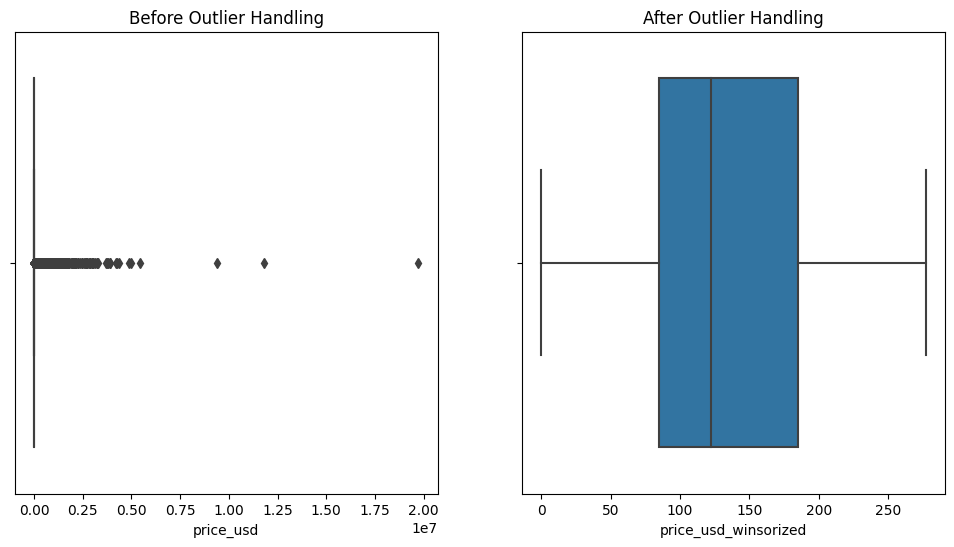

In [30]:
# Statistical Summary Comparison

print("Before Outlier Handling:")
print(training_data['price_usd'].describe())

print("After Outlier Handling:")
print(training_data['price_usd_winsorized'].describe())

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=training_data, x='price_usd', ax=ax[0])
ax[0].set_title('Before Outlier Handling')

sns.boxplot(data=training_data, x='price_usd_winsorized', ax=ax[1])
ax[1].set_title('After Outlier Handling')

plt.show()

In [4]:
# Correcting data types

training_data['date_time'] = pd.to_datetime(training_data['date_time'])
boolean_columns = ['srch_saturday_night_bool', 'random_bool', 'click_bool', 'booking_bool']
for col in boolean_columns:
    training_data[col] = training_data[col].astype('bool')

In [5]:
# checking for null values 

null = pd.DataFrame({'Null Values' : training_data.isna().sum(), 'Percentage Null Values' : (training_data.isna().sum()) / (training_data.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
srch_id,0,0.000000
date_time,0,0.000000
site_id,0,0.000000
visitor_location_country_id,0,0.000000
visitor_hist_starrating,4706481,94.920364
visitor_hist_adr_usd,4705359,94.897735
prop_country_id,0,0.000000
prop_id,0,0.000000
prop_starrating,0,0.000000
prop_review_score,7364,0.148517


In [ ]:
# High null values for "visitor_hist_starrating" and "visitor_hist_adr_usd" show that there are a lot of users
# with no purchase history. Hence, this also leads to a lot of missing comparative data.

In [12]:
# ========== Exploratory Data Analysis ====================

# Looking at how many users there are
unique_search_ids = training_data['srch_id'].nunique()
print(f"Unique search IDs: {unique_search_ids}")

# Looking at how many hotels there are
unique_hotel_ids = training_data['prop_id'].nunique()
print(f"Unique hotel IDs: {unique_hotel_ids}")

Unique search IDs: 199795
Unique hotel IDs: 129113


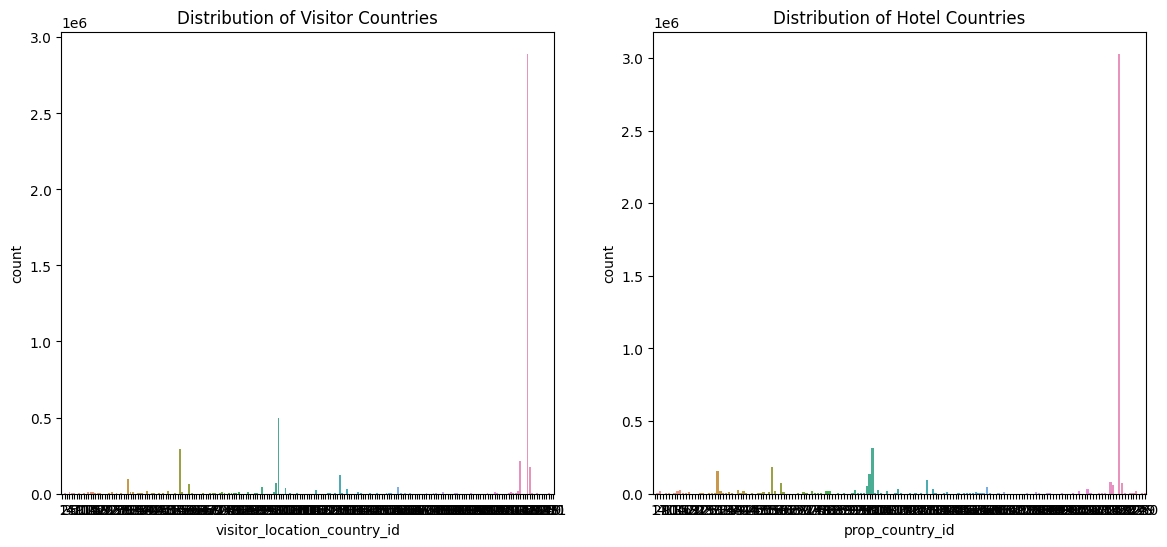

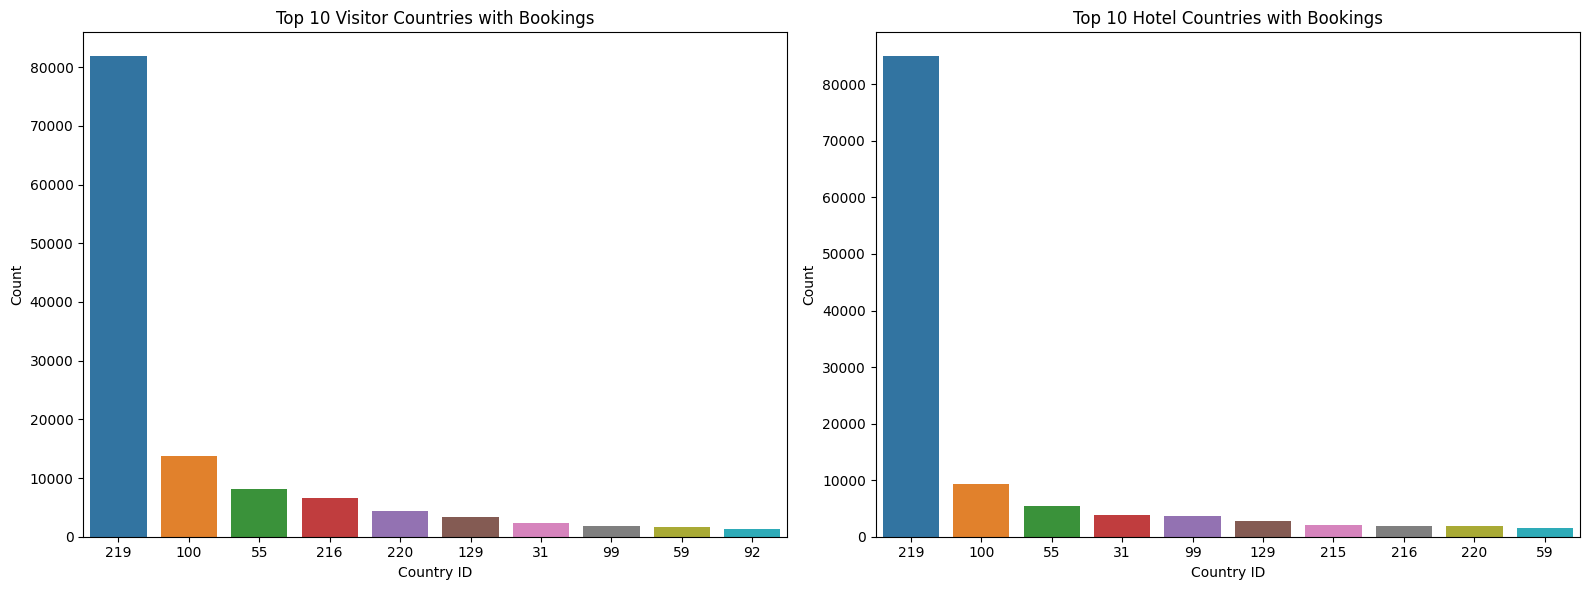

In [13]:
# Distribution of property and visitor countries
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(data=training_data, x='visitor_location_country_id', ax=ax[0])
ax[0].set_title('Distribution of Visitor Countries')
sns.countplot(data=training_data, x='prop_country_id', ax=ax[1])
ax[1].set_title('Distribution of Hotel Countries')
plt.show()

# Filter the data for actual bookings
booking_data = training_data[training_data['booking_bool'] == 1]

# Top N countries analysis
top_n = 10

# Top N for visitor locations based on bookings
top_visitor_countries = booking_data['visitor_location_country_id'].value_counts().nlargest(top_n).index
filtered_visitor_df = booking_data[booking_data['visitor_location_country_id'].isin(top_visitor_countries)]

# Top N for hotel locations based on bookings
top_hotel_countries = booking_data['prop_country_id'].value_counts().nlargest(top_n).index
filtered_hotel_df = booking_data[booking_data['prop_country_id'].isin(top_hotel_countries)]

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(data=filtered_visitor_df, x='visitor_location_country_id', ax=ax[0], order=top_visitor_countries)
ax[0].set_title('Top 10 Visitor Countries with Bookings')
ax[0].set_xlabel('Country ID')
ax[0].set_ylabel('Count')

sns.countplot(data=filtered_hotel_df, x='prop_country_id', ax=ax[1], order=top_hotel_countries)
ax[1].set_title('Top 10 Hotel Countries with Bookings')
ax[1].set_xlabel('Country ID')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


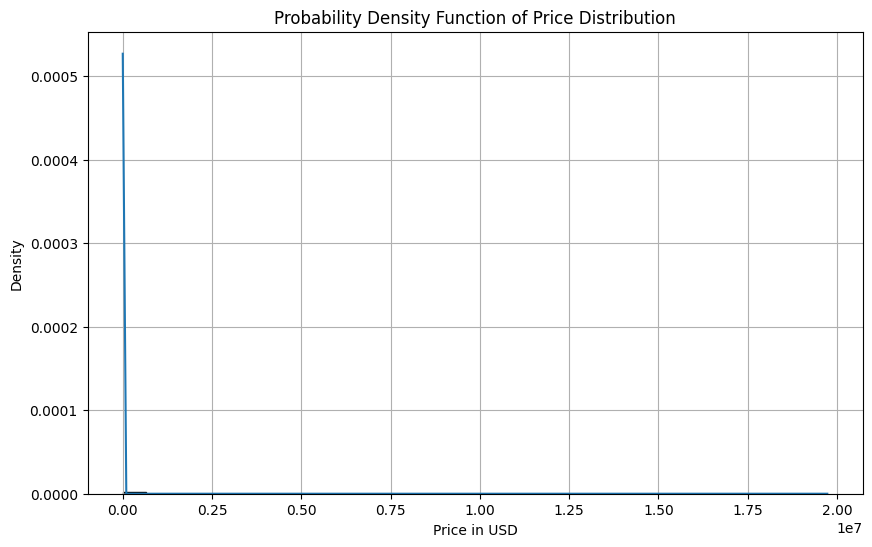

Highest price: 19726328.0
Lowest price: 0.0


In [14]:
# Probability Distribution Function of the prices
plt.figure(figsize=(10, 6))
sns.histplot(training_data['price_usd'], kde=True, stat='density', bins=30)  # Adjust bins if necessary
plt.title('Probability Density Function of Price Distribution')
plt.xlabel('Price in USD')
plt.ylabel('Density')
plt.grid(True)
plt.show()

highest_price = training_data['price_usd'].max()
lowest_price = training_data['price_usd'].min()

print(f"Highest price: {highest_price}")
print(f"Lowest price: {lowest_price}")

In [2]:
import numpy as np
# There are clear outliers in our data. To address this issue, we are applying a logarithmic transformation.

# Adding a small constant to avoid taking log of zero
training_data['log_price_usd'] = np.log(training_data['price_usd'] + 1)

plt.figure(figsize=(10, 6))
sns.histplot(training_data['log_price_usd'], kde=True, stat='density')
plt.title('Log-Transformed Probability Density Function of Price Distribution')
plt.xlabel('Log of Price in USD')
plt.ylabel('Density')
plt.grid(True)
plt.show()

NameError: name 'training_data' is not defined

In [ ]:
top_hotels_clicked = training_data[training_data['click_bool'] == 1]['prop_id'].value_counts().head(10)
print("Top 10 most clicked hotel IDs:")
print(top_hotels_clicked)

In [ ]:
# Extract year, month, and day
training_data['year'] = training_data['date_time'].dt.year
training_data['month'] = training_data['date_time'].dt.month
training_data['day_of_year'] = training_data['date_time'].dt.dayofyear

# Group by day of the year and calculate average price
daily_prices = training_data.groupby('day_of_year')['price_usd'].mean()

# Plotting
plt.figure(figsize=(12, 6))
daily_prices.plot()
plt.title('Average Daily Price Variation Over the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Average Price in USD')
plt.grid(True)
plt.show()

# Group by month and calculate average price
monthly_prices = training_data.groupby('month')['price_usd'].mean()

# Plotting
plt.figure(figsize=(12, 6))
monthly_prices.plot(kind='bar')
plt.title('Average Monthly Price Variation Over the Year')
plt.xlabel('Month')
plt.ylabel('Average Price in USD')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.show()

# Count bookings by day of the year
daily_bookings = training_data[training_data['booking_bool'] == 1].groupby('day_of_year').size()

# Plotting
plt.figure(figsize=(12, 6))
daily_bookings.plot()
plt.title('Booking Frequency by Day of the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()

# Count bookings by month
monthly_bookings = training_data[training_data['booking_bool'] == 1].groupby('month').size()

# Plotting
plt.figure(figsize=(12, 6))
monthly_bookings.plot(kind='bar')
plt.title('Booking Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.show()

# In the above graphs we can see a relation between the booking counts and the price which is in accordance
# to the economic intuition where the highest price occurs when the demand is the highest, in this case it's June.

In [ ]:
# Calculate correlations
# I selected features that seem to play a role based on my intuition and brief research
correlation_matrix = training_data[['price_usd', 'position','prop_starrating', 'prop_review_score', 'prop_location_score1', 'prop_location_score2', 'click_bool', 'booking_bool']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Example: Comparing property star ratings with respect to booking status
plt.figure(figsize=(10, 6))
sns.countplot(x='prop_starrating', hue='booking_bool', data=training_data)
plt.title('Property Star Rating vs Booking Status')
plt.xlabel('Property Star Rating')
plt.ylabel('Count')
plt.legend(title='Booked')
plt.show()

In [ ]:
# Filter the DataFrame for bookings only
booked_data = training_data[training_data['booking_bool'] == 1]

# Optionally handle NaN values
# For example, drop rows where either visitor_hist_adr_usd or price_usd is NaN
booked_data = booked_data.dropna(subset=['visitor_hist_adr_usd', 'price_usd'])

# If the dataset is too large, you might want to sample it for better visualization
sampled_data = booked_data.sample(frac=0.1, random_state=1) if len(booked_data) > 10000 else booked_data

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=sampled_data, x='visitor_hist_adr_usd', y='price_usd', hue='srch_id', palette='viridis', s=100, alpha=0.6)
plt.title('Relationship Between Historical Average Price and Booking Price by Search ID')
plt.xlabel('Historical Average Price per Night (USD)')
plt.ylabel('Price per Night at Booking (USD)')
plt.legend(title='Search ID', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside of the plot
plt.grid(True)
plt.show()

# The below plot shows that customers tend to book hotels approximately within the range of prices that are in  
# accordance to their previous booking history. 

In [ ]:
# Correlation Analyses

# Price and Booking Boolean
sns.boxplot(data=training_data, x='booking_bool', y='price_usd')
plt.title('Price vs Booking Status')
plt.show()

# Destination Distance and Booking Boolean
sns.boxplot(data=training_data, x='booking_bool', y='orig_destination_distance')
plt.title('Destination Distance vs Booking Status')
plt.show()

# Search Query Affinity Score and Booking Boolean
sns.boxplot(data=training_data, x='booking_bool', y='srch_query_affinity_score')
plt.title('Search Query Affinity Score vs Booking Status')
plt.show()

# Position and Booking Boolean
sns.boxplot(data=training_data, x='booking_bool', y='position')
plt.title('Position in Search Results vs Booking Status')
plt.show()

# Promotion Flag and Click Boolean
sns.countplot(data=training_data, x='promotion_flag', hue='click_bool')
plt.title('Promotion Impact on Clicks')
plt.show()

# Property Star Rating and Booking Boolean
sns.countplot(data=training_data, x='prop_starrating', hue='booking_bool')
plt.title('Property Star Rating vs Booking Status')
plt.show()

# Clicks to Bookings
clicks_to_bookings = training_data.groupby('srch_id')['click_bool'].sum()
bookings = training_data[training_data['booking_bool'] == 1].groupby('srch_id').size()
avg_clicks_before_booking = (clicks_to_bookings / bookings).mean()
print(f"Average clicks before booking: {avg_clicks_before_booking}")